# House Price

In this project, we will focus on exploring House Price data by analyzing several variables. We will use House Price dataset that you can found in the link below. The dataset consist of 81 columns with 1460 rows, and contains various information about properties for sale, for example location zone, number of bedrooms, land size, etc. But in this project, we will only focus on gathering insights from several columns that will be explained later.

Dataset:
* https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import data
house = pd.read_csv("train_house.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Check NaN
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [5]:
# Drop variabel NaN
house = house.dropna(axis=1)
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
# Split data into numerical & categorical
num_cols = house._get_numeric_data().columns
house_numeric = house[num_cols]
house_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
house_categorical = house.drop(num_cols, axis = 1)
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


## 1D Visualization 

**Tasks**

1. Create barplot visualization and analysis for categorical variable:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Create histogram visualization and analysis for numerical variable:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Apply data processing for each variable and write down the analysis.

### Categorical Variable

#### 1. Utilities

* `Utilities` filled with info about type of utilities available in those properties.
    * AllPub	All public Utilities (E,G,W,& S)
    * NoSeWa	Electricity and Gas Only	

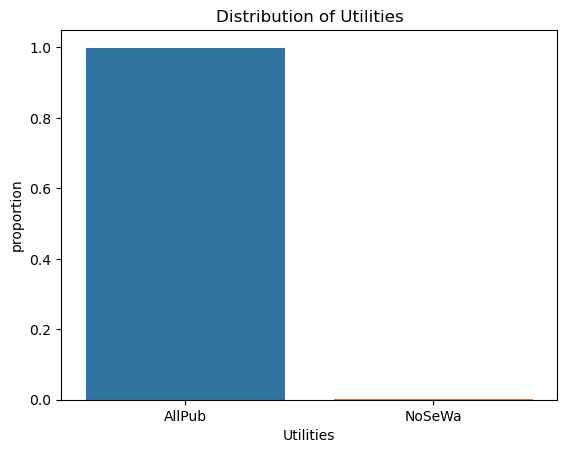

In [8]:
sns.barplot(x=house_categorical['Utilities'].value_counts().index,
                 y=house_categorical['Utilities'].value_counts(normalize = True))
plt.title("Distribution of Utilities")
plt.show()

#### **Analysis on `Utilities`**

* Almost 100% of all property data for sale has utilities that commonly available in residential properties (Electricity, Gas, Water, & Septic Tank).
* The remaining properties only have Electricity & Gas facilities.
* Let's see the numbers:

In [9]:
house_categorical['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

**There is only 1 property for sale that only have Electricity & Septic Tank, while all of them has the complete primary utilities (Electricity, Gas, Water, & Septic Tank).**

#### 2. HouseStyle

HouseStyle: property style
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl         Split Level

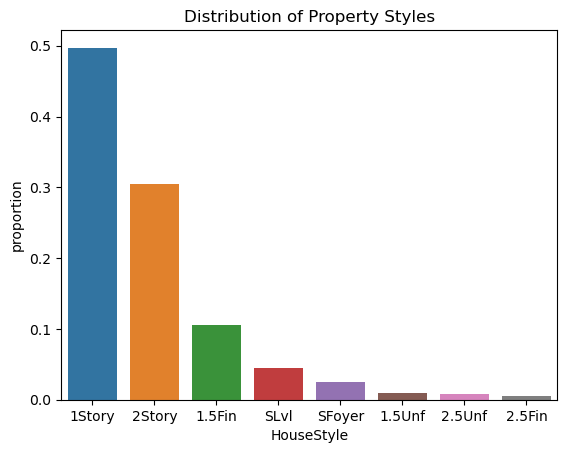

In [10]:
sns.barplot(x=house_categorical['HouseStyle'].value_counts().index,
                 y=house_categorical['HouseStyle'].value_counts(normalize = True))
plt.title("Distribution of Property Styles")
plt.show()

#### **Analysis on `HouseStyle`**

* The data is imbalanced.
* Where almost 50% of properties for sale are 1 floor (1Story) type.
* Around 30% of the others are of the 2-story type (2Story).
* And the other property types combined are probably around 20%.
* Question:
     * Why are the majority properties for sale 1-story homes?
     * Is it because demand is higher among other types?
     * Or is it related to the selling price of the property?

#### 3. ExterQual

ExterQual: Exterior material quality 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

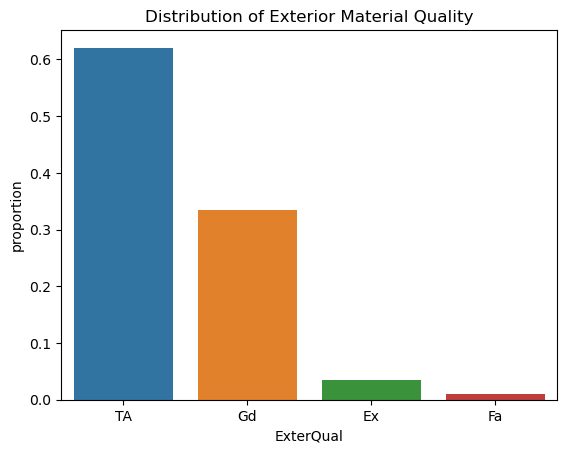

In [11]:
sns.barplot(x=house_categorical['ExterQual'].value_counts().index,
                 y=house_categorical['ExterQual'].value_counts(normalize = True))
plt.title("Distribution of Exterior Material Quality")
plt.show()

#### **Analysis on `ExterQual`**

* This data is also imbalanced.
* More than 60% of properties for sale have standard exterior quality (TA).
* The other 30% have Good quality (Gd).
* And some of the remaining properties have very good (Ex) and fairly/below average (Fa) quality.
* Question:
     * Why are many properties sold with standard exterior quality?
     * Is it related to the high demand for this type of property?
     * Does this variable affect the selling price of the property?

### Numerical Variable

#### 1. SalePrice

* SalePrice is target variable to predict
* In physical terms, this means the price of the property for sale

C:\Users\sabri\AppData\Local\Temp\ipykernel_8472\1989627698.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 163000.0
Mean: 180921.19589041095
Std Dev: 79442.50288288663


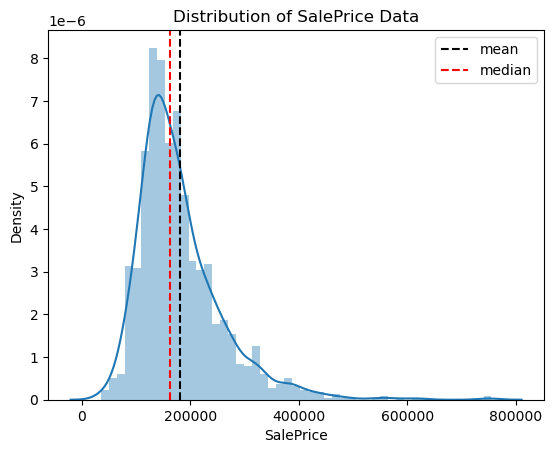

In [12]:
x = house_numeric["SalePrice"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
plt.title("Distribution of SalePrice Data")
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analysis on `SalePrice`**

* Distribution is right-skewed.
* Most data is in the range of around 100,000 to 300,000. Is this reasonable for US home prices?
* Value is always positive. However, if entered into an ML model the prediction results can be negative if they are wrong.
* We will try a log-scale transformation later.
    * Makes the distribution look like a normal distribution.
    * Forces price values to always be positive, even when included in the model.

#### 2. GrLivArea

* GrLivArea contains information regarding the size of the living area above ground level (excluding the basement)
* The units used are *square feet*

C:\Users\sabri\AppData\Local\Temp\ipykernel_8472\2666531639.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 1464.0
Mean: 1515.463698630137
Std Dev: 525.4803834232027


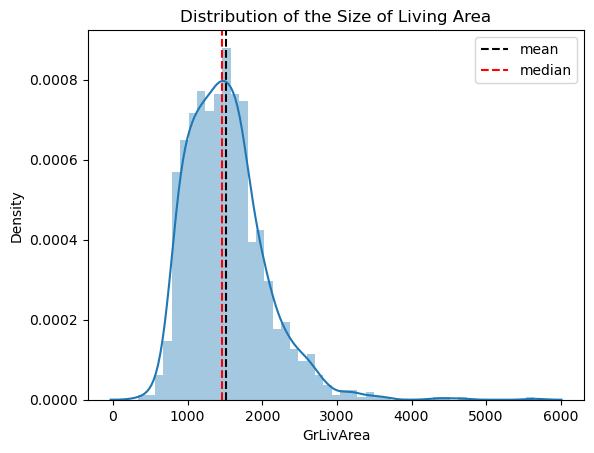

In [13]:
x = house_numeric["GrLivArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
plt.title("Distribution of the Size of Living Area")
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analysis on `GrlivArea`**

* Distribution is also right-skewed.
* Most data is in the range of around 1000 to 2000 ft2.
* Value in this column is also must always be positive.
* We will also try a log-scale transformation for this one later.
    * Makes the distribution look like a normal distribution.
    * Forces area values to always be positive, even when included in the model.

#### 3. PoolArea

* PoolArea contains information regarding the size of the pool (if any)
* The unit used is *square feet*

C:\Users\sabri\AppData\Local\Temp\ipykernel_8472\2670759497.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 0.0
Mean: 2.758904109589041
Std Dev: 40.17730694453043


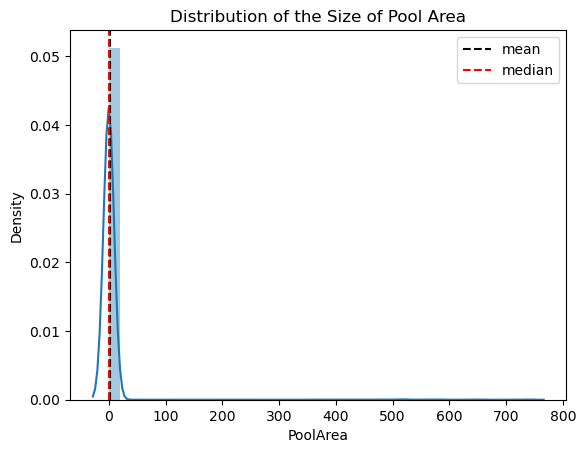

In [14]:
x = house_numeric["PoolArea"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
plt.title("Distribution of the Size of Pool Area")
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

* We can't see yet the distribution of the data, because it appears a lot of the values are closer to 0
* Let's see how many values in this column that is zero and nonzero

In [15]:
print('number of nonzero values:',np.sum(house_numeric["PoolArea"] != 0))
print('number of zero values:',np.sum(house_numeric["PoolArea"] == 0))

number of nonzero values: 7
number of zero values: 1453


#### **Analysis on `PoolArea`**

* Turns out the values with non-zero are only 7 rows!
* If we look at the description, `PoolArea: Pool area in square feet`.
* From this statement we can make a statement: "Not all houses have swimming pools".
* From this statement we can carry out further analysis by looking at the distribution of the PoolArea data that are nonzero.

### Data Processing on Numerical Variable

Median: 5.212187604403958
Mean: 5.221978956475628
Std Dev: 0.17347974217176843


C:\Users\sabri\AppData\Local\Temp\ipykernel_8472\2504938052.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


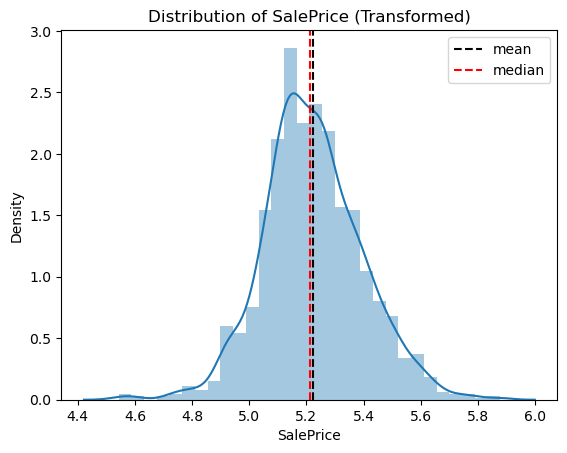

In [16]:
# log-10 Transformation SalePrice

x = np.log10(house_numeric["SalePrice"])
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
plt.title("Distribution of SalePrice (Transformed)")
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

Median: 3.165541076722373
Mean: 3.156354310389778
Std Dev: 0.14485910869663873


C:\Users\sabri\AppData\Local\Temp\ipykernel_8472\3317398984.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


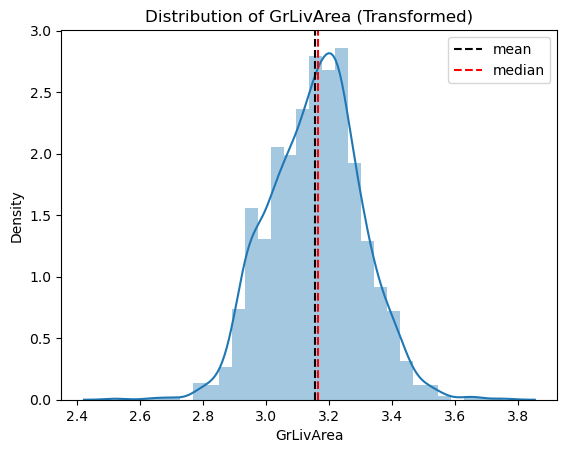

In [17]:
# log-10 Transformation GrLivArea

x = np.log10(house_numeric["GrLivArea"])
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
plt.title("Distribution of GrLivArea (Transformed)")
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

Median: 555.0
Mean: 575.4285714285714
Std Dev: 89.84033456240974


C:\Users\sabri\AppData\Local\Temp\ipykernel_8472\1570668145.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 4)


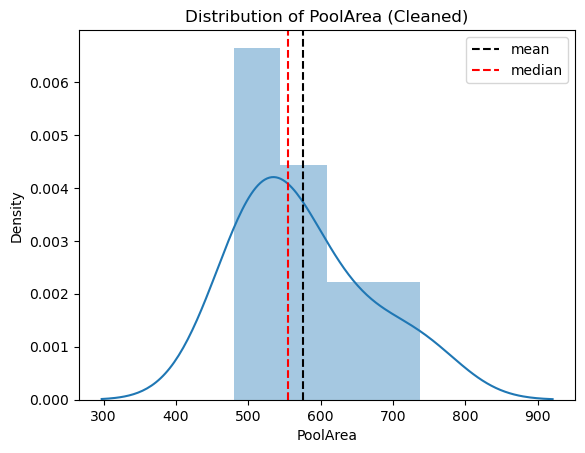

In [18]:
# Drop zero values on PoolArea

x = house_numeric["PoolArea"][house_numeric["PoolArea"] != 0]
sns.distplot(x, axlabel=x.name, bins = 4)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
plt.title("Distribution of PoolArea (Cleaned)")
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Analysis on Data Processing**

By using scale transformation or removing anomalies the distribution becomes closer to a normal distribution.

**Log-10 Transformation on SalePrice & GrLivArea:**
* We can see that both variables are now have a normal distribution.
* We can use this processed variables for further analysis using ML models.

**Drop zero values on PoolArea:**
* Now we can clearly see the distribution for the clusters that has PoolArea, which appears to be right-skewed.
* Most data is in the range of around 500 to 600 ft2.

## 2D Visualization

**Tasks**

1. Create a visualization of the relationship between:
     * `GrLivArea` with `SalePrice`
     * `GarageArea` with `SalePrice`

2. Create hypothesis about the relationships between variables

### `GrLivArea` with `SalePrice`

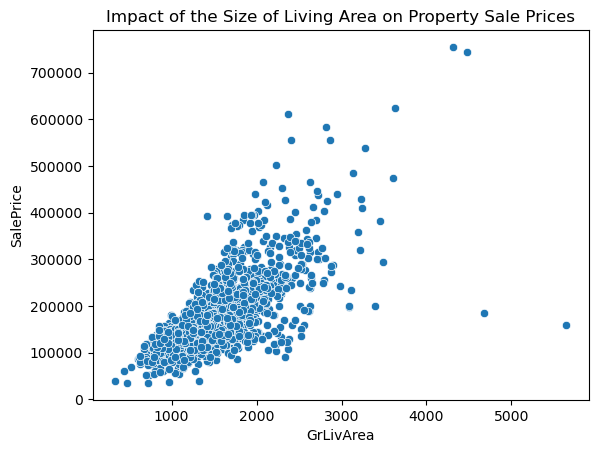

In [19]:
ax = sns.scatterplot(y="SalePrice", x="GrLivArea", data=house_numeric)
plt.title("Impact of the Size of Living Area on Property Sale Prices")
plt.show()

* We can see that the variable `GrLivArea` has a positive correlation with the variable `SalePrice`
* However, there is also data that has the possibility of anomalies.
* Namely the point at the far right and also the far up.
* From the scatterplot, we can also see the trendline of the analyzed data:

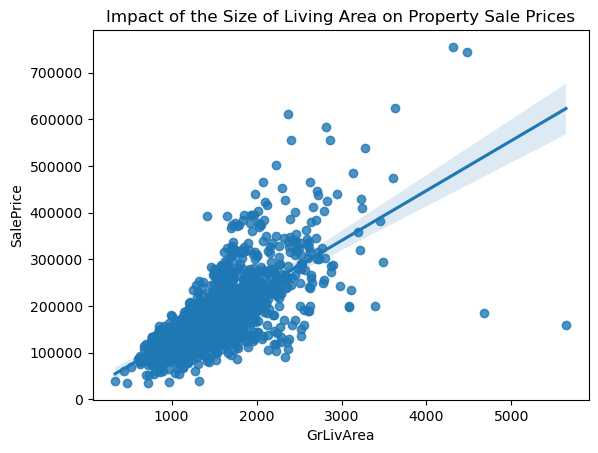

In [20]:
ax = sns.regplot(y="SalePrice", x="GrLivArea", data=house_numeric)
plt.title("Impact of the Size of Living Area on Property Sale Prices")
plt.show()

### `GarageArea` with `SalePrice`

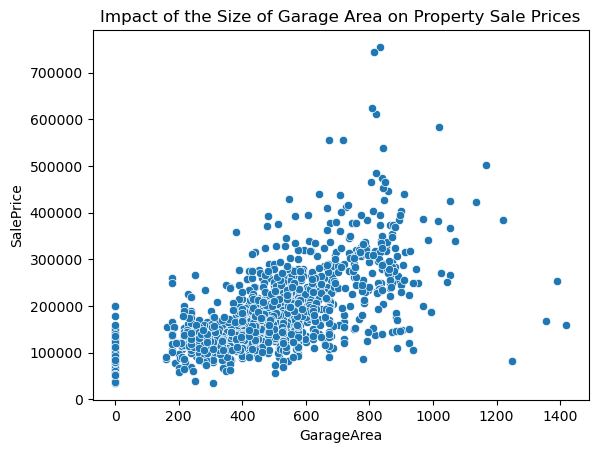

In [21]:
ax = sns.scatterplot(y="SalePrice", x="GarageArea", data=house_numeric)
plt.title("Impact of the Size of Garage Area on Property Sale Prices")
plt.show()

* Compare to correlation between `GrLivArea` with `SalePrice`, the relationship between `GarageArea` with `SalePrice` tend to be slightly positive and almost has no correlation.
* This is because by looking at the scatterplot, the data seems to be very scattered around.
* Let's see the trendline:

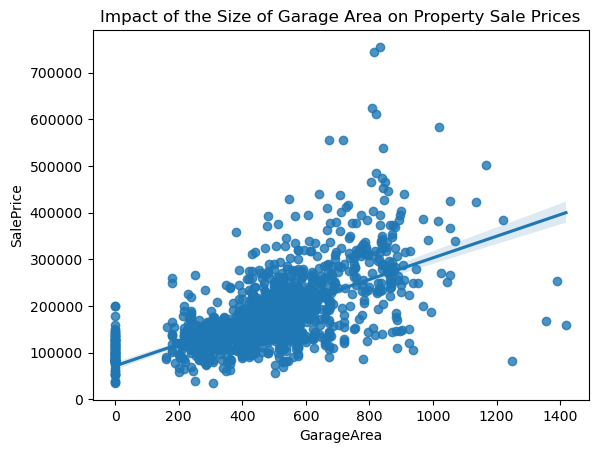

In [22]:
ax = sns.regplot(y="SalePrice", x="GarageArea", data=house_numeric)
plt.title("Impact of the Size of Garage Area on Property Sale Prices")
plt.show()

#### **Hypothesis about relationship between variables**

* From both relationships, we can see that the relationship between `GrLivArea` and `SalePrice` is much more positive than the relationship between `GarageArea` and `SalePrice`.
* This indicates that the wider the living area above ground level of a property, the higher the sales prices for that property will be.
* On the other hand, the wider the garage area of a property, the sales prices for that property will only be slightly higher.
* Let's compare the correlation between these two relationships.

In [23]:
matrix = house_numeric[['SalePrice', 'GrLivArea', 'GarageArea']].corr()
print(matrix)

            SalePrice  GrLivArea  GarageArea
SalePrice    1.000000   0.708624    0.623431
GrLivArea    0.708624   1.000000    0.468997
GarageArea   0.623431   0.468997    1.000000


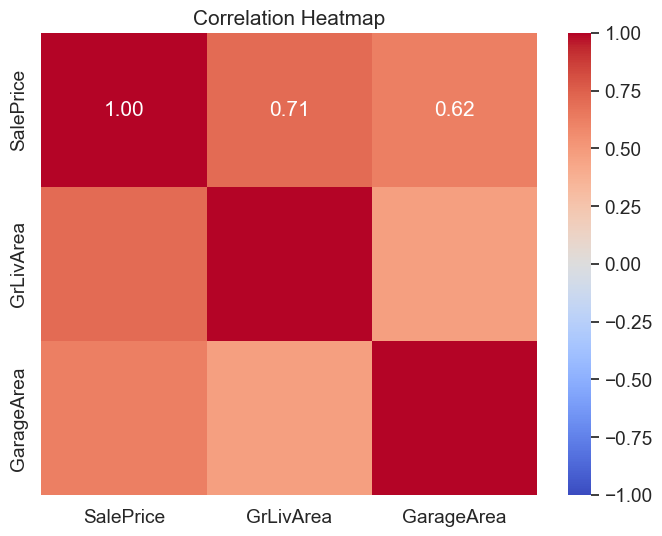

In [24]:
# Set the number of variables for the heatmap (you can adjust this as needed)
k = 3

# Get the top 'k' variables with the highest correlation to 'SalePrice'
cols = matrix.nlargest(k, 'SalePrice')['SalePrice'].index

# Calculate the correlation coefficients
cm = np.corrcoef(house_numeric[cols].values.T)

# Set font scale for better readability
sns.set(font_scale=1.25)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=cols.values, yticklabels=cols.values, vmin=-1.0, vmax=1.0)
plt.title("Correlation Heatmap")
plt.show()

**As we can see in the correlation heatmap, the relationship between `SalePrice` with `GrLivArea` is more positive (0.71) compare to the relationship between `SalePrice` with `GarageArea`.**